In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()

# Set Pandas options to show all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Make variable for input file
INFILE = "/Users/jck/Documents/MSDS 422/Unit 2/Assignment 2/HMEQ_Loss.csv"

# Read in the data file
df = pd.read_csv(INFILE, sep=',', header=0)

In [65]:
cols_with_missing = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

In [66]:
'''
I observed that some data points are outliers, so I plan to employ the Interquartile Range (IQR) method 
to detect these outliers and substitute them, using the median value for imputation.
'''
for col in cols_with_missing:
    # 1. Identify Outliers using the IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 2. Remove Outliers - Replace outliers in a copy of the column with NaN
    temp_col = df[col].copy()
    temp_col[(temp_col < lower_bound) | (temp_col > upper_bound)] = np.nan
    
    # 3. Calculate median of the column with outliers removed
    median_val = temp_col.median()
    
    # 4. Create new column for imputed values, fill missing values with the calculated median
    df['IMP_'+col] = df[col].fillna(median_val)

In [67]:
X = df.drop(['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT', 'REASON', 'JOB','MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], axis=1)


In [68]:
varNames = X.columns
print(X.head(5))

   LOAN  IMP_MORTDUE  IMP_VALUE  IMP_YOJ  IMP_DEROG  IMP_DELINQ   IMP_CLAGE  \
0  1100      25860.0    39025.0     10.5        0.0         0.0   94.366667   
1  1300      70053.0    68400.0      7.0        0.0         2.0  121.833333   
2  1500      13500.0    16700.0      4.0        0.0         0.0  149.466667   
3  1500      63508.0    86908.0      7.0        0.0         0.0  172.432355   
4  1700      97800.0   112000.0      3.0        0.0         0.0   93.333333   

   IMP_NINQ  IMP_CLNO  IMP_DEBTINC  
0       1.0       9.0    34.880462  
1       0.0      14.0    34.880462  
2       1.0      10.0    34.880462  
3       1.0      20.0    34.880462  
4       0.0      14.0    34.880462  


In [69]:
theScaler = StandardScaler()
theScaler.fit( X )

X_STD = theScaler.transform( X )

MAX_N = X_STD.shape[1]
pca = PCA(n_components=MAX_N)
pca.fit( X_STD )

ev = pca.explained_variance_
print("Eigen Values")
print(ev)


Eigen Values
[2.22678593 1.3972021  1.24219402 1.00210919 0.95919818 0.84814191
 0.78420711 0.71896067 0.62892063 0.1939584 ]


In [70]:
varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append( PCT )
    print( round(i,2), "variation=", VAR,"%"," total=", PCT,"%")


2.23 variation= 22 %  total= 22 %
1.4 variation= 13 %  total= 36 %
1.24 variation= 12 %  total= 48 %
1.0 variation= 10 %  total= 58 %
0.96 variation= 9 %  total= 68 %
0.85 variation= 8 %  total= 76 %
0.78 variation= 7 %  total= 84 %
0.72 variation= 7 %  total= 91 %
0.63 variation= 6 %  total= 98 %
0.19 variation= 1 %  total= 100 %


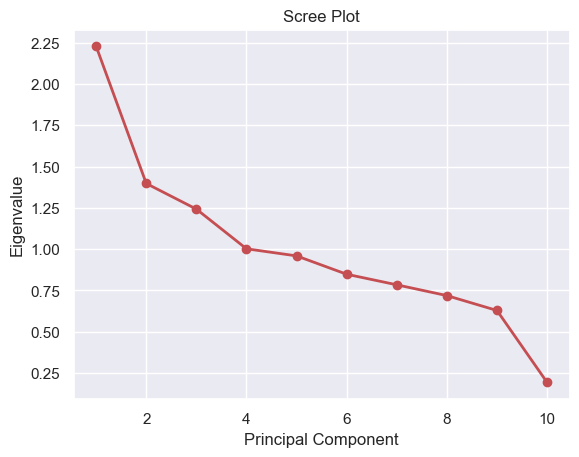

In [71]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()



In [72]:
dfc = pd.DataFrame( pca.components_ )
dfc.columns = list( X.columns)
print( dfc )


       LOAN  IMP_MORTDUE  IMP_VALUE   IMP_YOJ  IMP_DEROG  IMP_DELINQ  \
0  0.311656     0.573576   0.584033  0.035267  -0.026517    0.051584   
1 -0.075914     0.008363  -0.067113 -0.320210   0.497436    0.341984   
2 -0.062894    -0.220351  -0.186765  0.510239   0.223665    0.527167   
3  0.683398    -0.139746   0.015936  0.457913   0.199483   -0.157458   
4 -0.063127    -0.166985  -0.189458  0.222739  -0.478411   -0.197432   
5  0.178754     0.016538   0.072945  0.099504   0.001104    0.445783   
6  0.165274    -0.158406  -0.120615 -0.222718   0.559632   -0.451868   
7 -0.545650     0.225785   0.191625  0.556459   0.339547   -0.321634   
8 -0.234218     0.131968   0.164850 -0.061831   0.066327    0.179859   
9 -0.101358    -0.693695   0.706829 -0.060058  -0.016630    0.001908   

   IMP_CLAGE  IMP_NINQ  IMP_CLNO  IMP_DEBTINC  
0   0.233234  0.046249  0.372911     0.180494  
1  -0.347789  0.511831  0.165894     0.335088  
2   0.454836 -0.032023  0.333392    -0.072681  
3  -0.142818  0

In [73]:
X_STD[0:5]

array([[-1.5622993 , -1.10413877, -1.09840248,  0.24023673, -0.28097618,
        -0.37594296, -1.01733584, -0.10287928, -1.23087808,  0.11334852],
       [-1.54445258, -0.06615752, -0.58191903, -0.24193566, -0.28097618,
         1.47734078, -0.68867641, -0.70757403, -0.72838939,  0.11334852],
       [-1.52660585, -1.39444375, -1.4909299 , -0.65522627, -0.28097618,
        -0.37594296, -0.35802268, -0.10287928, -1.13038034,  0.11334852],
       [-1.52660585, -0.21988293, -0.25650369, -0.24193566, -0.28097618,
        -0.37594296, -0.08322087, -0.10287928, -0.12540297,  0.11334852],
       [-1.50875913,  0.58554899,  0.18467428, -0.7929898 , -0.28097618,
        -0.37594296, -1.02970045, -0.70757403, -0.72838939,  0.11334852]])

In [74]:
pca = PCA(n_components=MAX_N)
pca.fit( X_STD )


X_PCA = pca.transform( X_STD )
X_PCA = pd.DataFrame( X_PCA )
X_PCA = X_PCA.iloc[:,0:2]


colNames = X_PCA.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append( theName )
    
X_PCA.columns = pcaNames

print( X_PCA.head() )
print("\n\n")

       PC_1      PC_2
0 -2.445766 -0.027228
1 -1.228533  0.393179
2 -2.670733  0.068084
3 -0.822651 -0.066132
4 -0.590462  0.005735





Append the Targets Variable - TARGET_BAD_FLAG
I refrained from including all target variables and categorical variables to avoid complicating the model and generating unnecessary information.

In [75]:
X_PCA['TARGET'] = df['TARGET_BAD_FLAG']

print( X_PCA.head() )

       PC_1      PC_2  TARGET
0 -2.445766 -0.027228       1
1 -1.228533  0.393179       1
2 -2.670733  0.068084       1
3 -0.822651 -0.066132       1
4 -0.590462  0.005735       0


# Interpret the PRINCIPAL COMPONENTS


In [76]:
for Name, Group in X_PCA.groupby("TARGET"):
    print( Group.head() )
    print("\n")
    

        PC_1      PC_2  TARGET
4  -0.590462  0.005735       0
13 -0.760372 -0.008919       0
19 -0.546859 -0.115097       0
26 -0.662920 -0.295637       0
29 -2.216851 -0.624832       0


       PC_1      PC_2  TARGET
0 -2.445766 -0.027228       1
1 -1.228533  0.393179       1
2 -2.670733  0.068084       1
3 -0.822651 -0.066132       1
5 -2.324857  0.085930       1




If the values of PC_1 and PC_2 are close to one, it suggests a higher likelihood that the loan will not default. Conversely, if these values are not close to one, the probability increases that the outcome will indicate the loan is likely to default.

# Plot the PRINCIPAL COMPONENTS

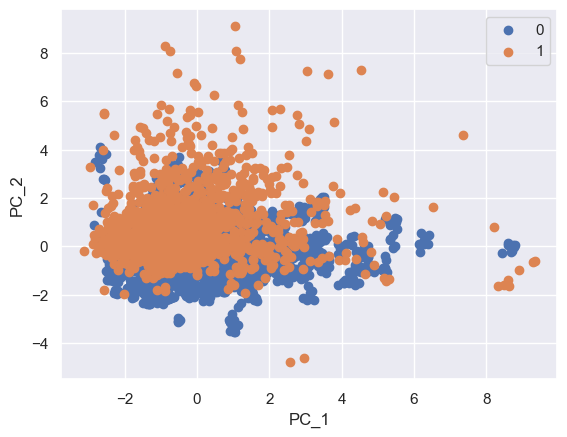

In [77]:
for Name, Group in X_PCA.groupby("TARGET"):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()

Based on the scatter plot, distinguishing between the two classes is challenging. However, points closer to 0 are more likely to default. If the PC_2 values in the scatter plot are below -1.5, the loan is likely not to default. Conversely, values above -1.5 indicate a higher probability of loan default."

In [78]:
!jupyter nbconvert --to pdf Assignment_unit99.ipynb

[NbConvertApp] Converting notebook Assignment_unit99.ipynb to pdf
[NbConvertApp] Support files will be in Assignment_unit99_files/
[NbConvertApp] Making directory ./Assignment_unit99_files
[NbConvertApp] Writing 40318 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 108695 bytes to Assignment_unit99.pdf
